In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

In [17]:
data = read_csv('processed_data_input4.csv',header=None)
y = read_csv('processed_data_output4.csv',header=None)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, shuffle=True)

print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))



Shape of Train Data : (152287, 15)
Shape of Test Data : (38072, 15)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(15,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(16, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(6, activation='softmax',kernel_initializer='random_uniform'))


In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

hist = model.fit(X_train , y_train , epochs=10, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 102       
Total params: 5,334
Trainable params: 5,334
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3808/3808 [==============================] - 4s 1ms/step - loss: 0.1286 - accuracy: 0.9526 - val_loss: 0.13

In [4]:
model.load_weights('dnn_full_w_oh.h5')

In [77]:
model.save_weights('dnn_not_full_w_oh.h5')


In [31]:
test = [.489]

In [32]:
import numpy as np
def predict_state(test_dat):
    
    
    
    for i in test_dat:
        print('Bearing Fault : '+str("{:.2f}".format(i*100))+" %")

In [33]:
predict_state(test)

Bearing Fault : 48.90 %


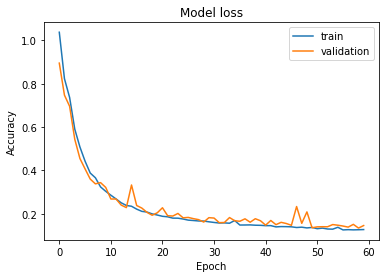

In [59]:
import matplotlib.pyplot as plt
import pylab
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
#plt.show()
pylab.savefig('fpp.png')


In [43]:
plt.savefig('books_read.png')

<Figure size 432x288 with 0 Axes>

In [18]:

import numpy as np


predicted = np.argmax(model.predict(X_train), axis = 1)

In [19]:
print(len(predicted))

152287


In [20]:
a = y_train.values.tolist()
flatten_list = lambda y:[x for a in y for x in flatten_list(a)] if type(y) is list else [y]

In [21]:
flat = flatten_list(a)

In [22]:
len(flat)

152287

In [23]:
def accuracy(l1, l2):
    count = [0]*6
    correct = [0]*6
    for i in range(len(l1)):
        count[l1[i]]+=1
        if l1[i]==l2[i]:
            correct[l1[i]]+=1
    return count, correct


count, correct = accuracy(flat, predicted)
